In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# FORMAT FOR CONVENIENT ANALYSIS

In [83]:
#complete methodology table as dataframe
ms_complete = pd.read_csv('methods.csv')

In [84]:
#filter to include only columns 'Tools', 'Year', 'PIM', drop unfilled rows, convert year to int values
ms_filtered = ms_complete[["Tools", "Year", "PIM "]].dropna().reset_index()
ms_filtered.Year = ms_filtered.Year.astype(int)

#get sorted list of tools
a = ms_filtered.Tools.str.split(', ', expand=True).to_numpy()
all_tools = np.unique(a[a != np.array(None)])

#create new database with tools as columns
new_columns = {t:None for t in all_tools}
for k in new_columns:
    new_columns[k] = ms_filtered.Tools.str.split(', ', expand=True).isin([k]).any(axis=1)
ms_tools = pd.concat([ms_filtered.drop('Tools', axis=1), pd.DataFrame.from_dict(new_columns)], axis=1)

In [ ]:
# ONE USE: BARPLOT AND COUNTS FOR POSTER

In [85]:
# filter out categories/methods (not tools), tools used <= 2 times
to_include = []
for i in ms_tools.columns:
    if i in ['index', 'Year', 'PIM ', 'FPGA/Synthesis', 'In-house Simulator', 'SPICE']:
        continue
    elif ms_tools[i].sum() > 2:
        to_include.append(i)

In [86]:
# return list of counts within given range of years
def count(lo, hi, tools=to_include, df=ms_tools):
    filtered = df[df['Year'].isin(list(range(lo, hi+1)))]
    to_return = []
    for t in tools:
        to_return.append(filtered[t].sum())
    return to_return


In [87]:
# count tools within year ranges
tool_counts = {
    '2013-2016': count(2013, 2016),
    '2017-2020': count(2017, 2020),
    '2021-2024': count(2021, 2024)
}

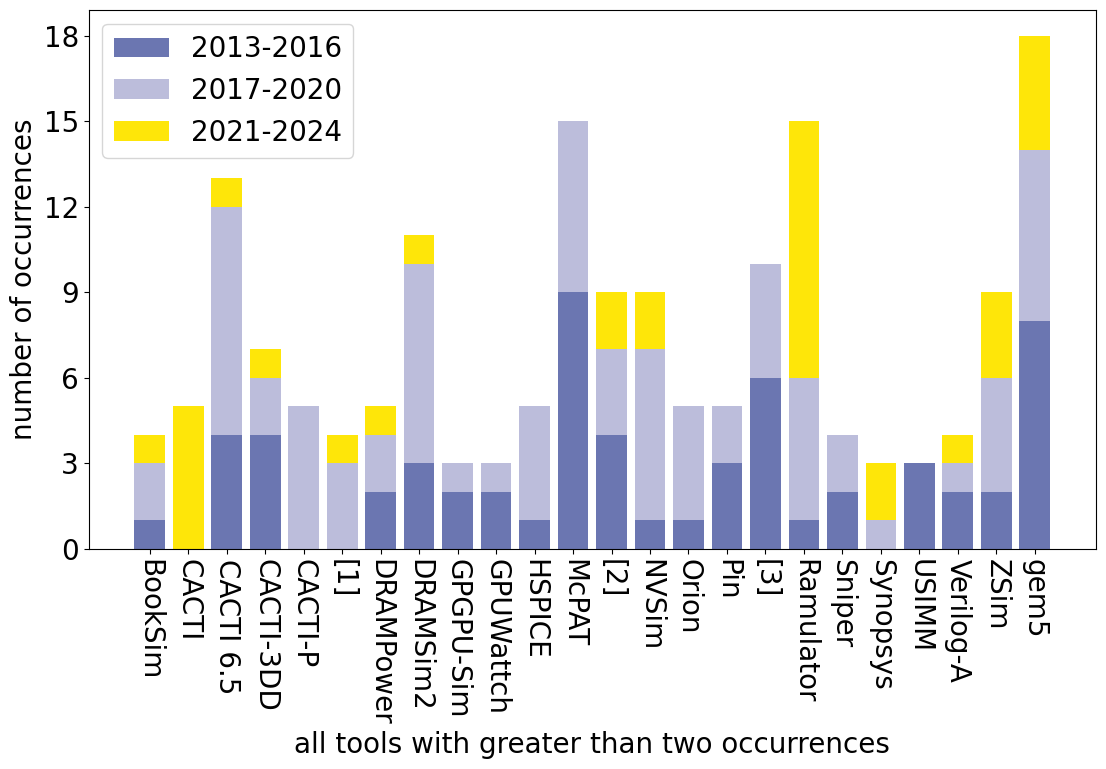

In [88]:
colors = ['#6b76b1', '#bcbddb', '#fee609', '#fcf49f', '#e6e7e8']
plt.rcParams.update({'font.size': 20})
xlabels = to_include
xlabels[5] = '[1]'
xlabels[12] = '[2]'
xlabels[16] = '[3]'
f, ax = plt.subplots()
bottom = np.zeros(len(to_include))
i = 0
for tool, count in tool_counts.items():
    p = ax.bar(to_include, count, label=tool, bottom=bottom, color=colors[i])
    bottom += count
    i += 1
ax.legend()
ax.set_ylabel('number of occurrences')
ax.set_xlabel('all tools with greater than two occurrences')
ax.set_yticks(list(range(0, 21, 3)))
ax.set_xticks(to_include)
ax.set_xticklabels(xlabels)
ax.tick_params(axis='x', labelrotation=-90)
f.set_size_inches(13, 7)
plt.show()

In [89]:
cacti_total = 0
cacti_cols = ['CACTI', 'CACTI 6.5', 'CACTI-3DD', 'CACTI-P']
for i in cacti_cols:
    cacti_total += ms_tools[i].sum()
print(f"overall cacti occurrences: {cacti_total}")
print(f"total ramulator occurrences: {ms_tools['Ramulator'].sum()}")
countram = ms_tools[ms_tools['Year'].isin(list(range(2021, 2025)))]
print(f"ramulator 2021-2024: {countram['Ramulator'].sum()}")

overall cacti occurrences: 30
total ramulator occurrences: 15
ramulator 2021-2024: 9


In [90]:
#IDEAS: grouped by approaches, percentages to account for different amounts in groups

In [91]:
#CATEGORIES
#In-House Simulator
#GPU Simulator: GPGPU-Sim, GPUWattch
#DRAM Simulator: DRAMSim2, 
#Circuit Modeling: Synopsys, Verilog-A
#Full-System Simulators: gem5